In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras import Sequential, layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
import warnings
warnings.filterwarnings('ignore')

### Loading Train and Test Data

In [84]:
train_data=pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
test_data=pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')

In [85]:
train_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [86]:
test_data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148
...,...,...,...,...,...,...,...,...,...,...,...
7669861,19174659,Male,57,1,28.0,0,1-2 Year,Yes,51661.0,124.0,109
7669862,19174660,Male,28,1,50.0,1,< 1 Year,No,25651.0,152.0,184
7669863,19174661,Male,47,1,33.0,1,1-2 Year,No,2630.0,138.0,63
7669864,19174662,Male,30,1,28.0,0,< 1 Year,Yes,38866.0,124.0,119


### Data Preprocessing

In [87]:
df=train_data.copy()
dft=test_data.copy()

In [88]:
df.duplicated().sum()

0

In [89]:
dft.duplicated().sum()

0

In [90]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [91]:
dft.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [93]:
df.drop(['id'], axis=1, inplace=True)
dft.drop(['id'], axis=1, inplace=True)

In [94]:
df['Driving_License'].value_counts()

Driving_License
1    11482041
0       22757
Name: count, dtype: int64

In [95]:
df['Previously_Insured'].value_counts()

Previously_Insured
0    6178116
1    5326682
Name: count, dtype: int64

In [96]:
df['Driving_License']=df['Driving_License'].astype('category')
df['Previously_Insured']=df['Previously_Insured'].astype('category')
df['Region_Code']=df['Region_Code'].astype('object')

In [97]:
dft['Driving_License']=dft['Driving_License'].astype('category')
dft['Previously_Insured']=dft['Previously_Insured'].astype('category')
dft['Region_Code']=dft['Region_Code'].astype('object')

In [98]:
df.drop(['Policy_Sales_Channel'], axis=1, inplace=True)
dft.drop(['Policy_Sales_Channel'], axis=1, inplace=True)

In [99]:
df['Gender'].value_counts()

Gender
Male      6228134
Female    5276664
Name: count, dtype: int64

In [100]:
df['Gender']=df['Gender'].map({'Male':0, 'Female':1}).astype('category')
dft['Gender']=dft['Gender'].map({'Male':0, 'Female':1}).astype('category')

In [101]:
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No':0}).astype('category')
dft['Vehicle_Damage']=dft['Vehicle_Damage'].map({'Yes':1, 'No':0}).astype('category')

In [102]:
df['Vehicle_Age'].value_counts()

Vehicle_Age
1-2 Year     5982678
< 1 Year     5044145
> 2 Years     477975
Name: count, dtype: int64

In [103]:
df['Vehicle_Age']=df['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3}).astype('category')
dft['Vehicle_Age']=dft['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2, '> 2 Years':3}).astype('category')

In [104]:
df['Response']=df['Response'].astype('category')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 10 columns):
 #   Column              Dtype   
---  ------              -----   
 0   Gender              category
 1   Age                 int64   
 2   Driving_License     category
 3   Region_Code         object  
 4   Previously_Insured  category
 5   Vehicle_Age         category
 6   Vehicle_Damage      category
 7   Annual_Premium      float64 
 8   Vintage             int64   
 9   Response            category
dtypes: category(6), float64(1), int64(2), object(1)
memory usage: 416.9+ MB


### EDA

<Axes: xlabel='Response', ylabel='count'>

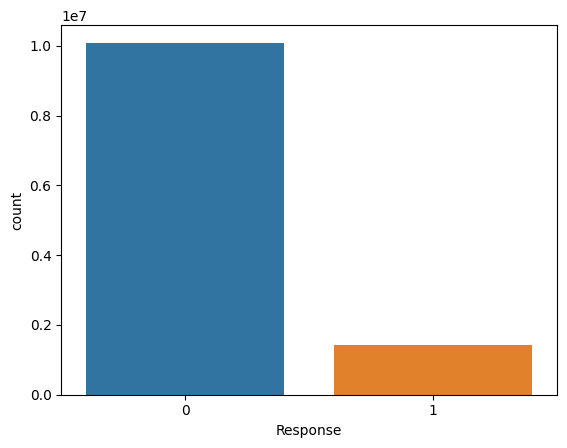

In [106]:
sns.countplot(df, x='Response')

The dataset is highly imbalanced.

In [107]:
df['Response'].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [108]:
np.random.seed(0)
df_bal=df.groupby('Response', group_keys=False).apply(lambda x: x.sample(1415059))

In [109]:
df_bal.shape

(2830118, 10)

In [110]:
df=df_bal.copy()

In [111]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
3527563,1,37,1,28.0,0,2,1,2630.0,134,0
532821,1,23,1,41.0,1,1,0,27164.0,247,0
8741152,0,23,1,46.0,0,2,1,34335.0,149,0
5473207,0,22,1,44.0,1,1,0,2630.0,265,0
7962420,1,40,1,28.0,1,2,0,38118.0,257,0


In [112]:
df.duplicated().sum()

55826

In [113]:
df=df.drop_duplicates()

<Axes: xlabel='Response', ylabel='count'>

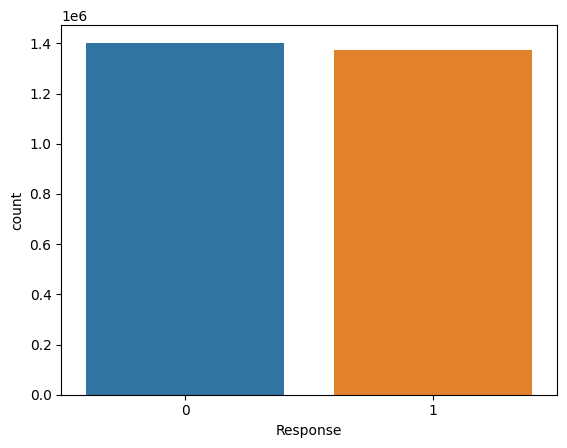

In [114]:
sns.countplot(df, x='Response')

<Axes: xlabel='Response', ylabel='Annual_Premium'>

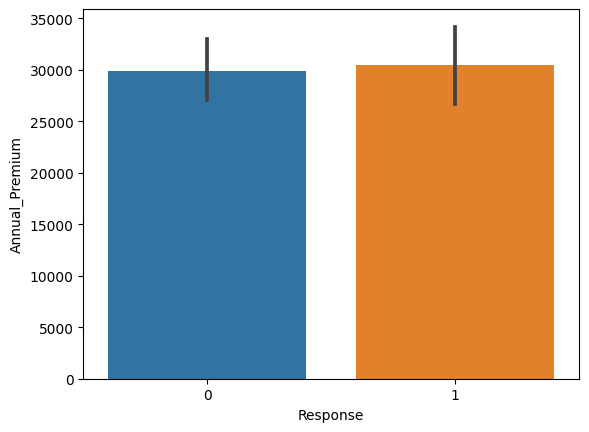

In [115]:
sns.barplot(df_bal.sample(200), x='Response', y='Annual_Premium')

The dataset is balanced now.

<Axes: xlabel='Vehicle_Age', ylabel='count'>

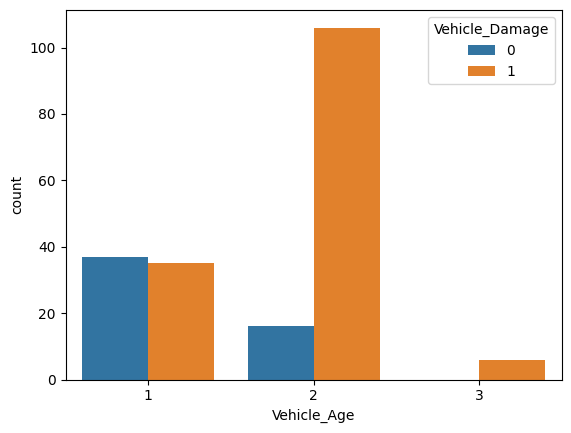

In [116]:
sns.countplot(df.sample(200), hue='Vehicle_Damage', x='Vehicle_Age')

<Axes: ylabel='count'>

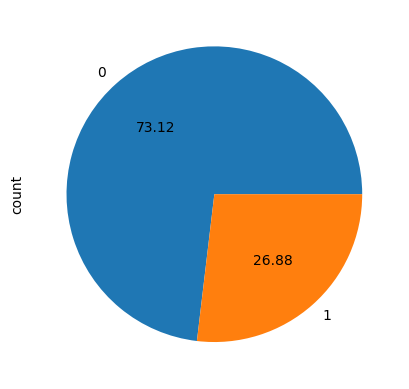

In [117]:
df['Previously_Insured'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Response', ylabel='Age'>

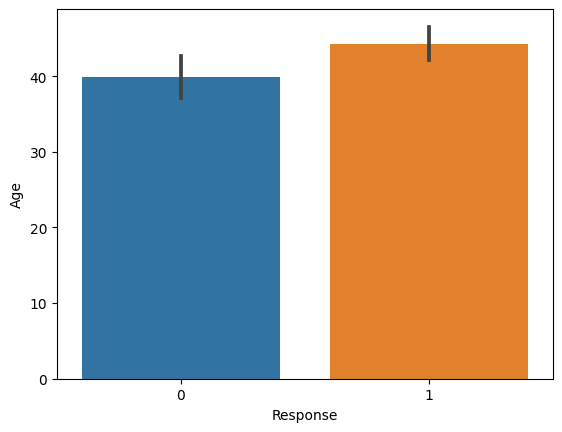

In [118]:
sns.barplot(df.sample(200), y='Age', x='Response')

<Axes: >

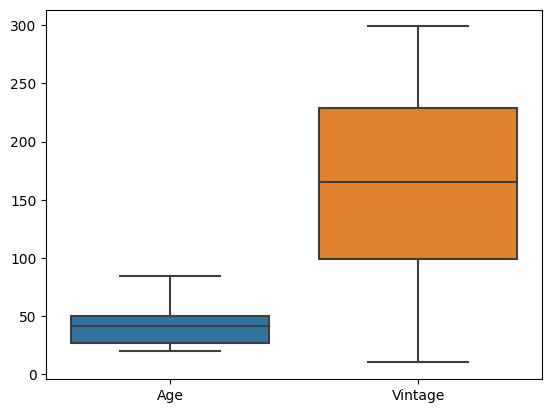

In [119]:
sns.boxplot(df[['Age', 'Vintage']])

### Identifying Best Features

In [120]:
df['Response']=df['Response'].astype('int')

In [121]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [122]:
from sklearn.feature_selection import chi2, SelectKBest
best=SelectKBest(score_func=chi2, k='all')
best.fit(X,Y)

SelectKBest(k='all', score_func=<function chi2 at 0x7fddbe516d40>)

In [123]:
features_df=pd.DataFrame(best.scores_, columns=['Scores'], index=best.get_feature_names_out()).sort_values(by='Scores', ascending=False)

In [124]:
features_df

,Scores
Annual_Premium,1.055359e+08
Previously_Insured,7.160548e+05
Age,5.528349e+05
Vehicle_Damage,2.955447e+05
Vehicle_Age,6.409037e+04
Vintage,5.941303e+04
Gender,1.161949e+04
Region_Code,6.688540e+03
Driving_License,1.071359e+00


### Model

In [125]:
np.random.seed(0)
df=df.sample(frac=0.1)

In [126]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [128]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train, test_size=0.2, random_state=0)

In [129]:
x_train.shape

(177554, 9)

In [130]:
x_val.shape

(44389, 9)

In [131]:
x_test.shape

(55486, 9)

In [132]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_val=scaler.transform(x_val)
x_test=scaler.transform(x_test)

In [133]:
metrics=[
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.TruePositives(name='TP'),
    keras.metrics.TrueNegatives(name='TN'),
    keras.metrics.FalsePositives(name='FP'),
    keras.metrics.FalseNegatives(name='FN'),
    keras.metrics.Precision(name='Precision'),
    keras.metrics.Recall(name='Recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.AUC(name='prc', curve='PR')
]

In [134]:
model=Sequential([
    layers.Dense(16, input_shape=(x_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')])    

In [135]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=metrics)

In [136]:
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [137]:
ann=model.fit(x_train, y_train,
                  epochs=200,
                  batch_size=100,
                  callbacks=[early_stopping],
                  shuffle=True,
                  verbose=1,
                  validation_data=(x_val, y_val))

Epoch 1/200
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - FN: 3724.2830 - FP: 15875.1182 - Precision: 0.7119 - Recall: 0.8748 - TN: 29281.0469 - TP: 40019.4414 - accuracy: 0.7660 - auc: 0.8204 - loss: 0.4685 - prc: 0.7446 - val_FN: 1483.0000 - val_FP: 7652.0000 - val_Precision: 0.7263 - val_Recall: 0.9319 - val_TN: 14947.0000 - val_TP: 20307.0000 - val_accuracy: 0.7942 - val_auc: 0.8485 - val_loss: 0.4258 - val_prc: 0.7773
Epoch 2/200
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - FN: 3139.2854 - FP: 15163.8232 - Precision: 0.7281 - Recall: 0.9280 - TN: 29947.4785 - TP: 40649.3047 - accuracy: 0.7937 - auc: 0.8469 - loss: 0.4290 - prc: 0.7759 - val_FN: 1393.0000 - val_FP: 7670.0000 - val_Precision: 0.7267 - val_Recall: 0.9361 - val_TN: 14929.0000 - val_TP: 20397.0000 - val_accuracy: 0.7958 - val_auc: 0.8511 - val_loss: 0.4238 - val_prc: 0.7810
Epoch 3/200
1776/1776 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - FN: 3294.3950 - FP: 14805.9990 - Precision: 0.7324 - Recall: 0.9251 - TN: 30228.1719 - TP:

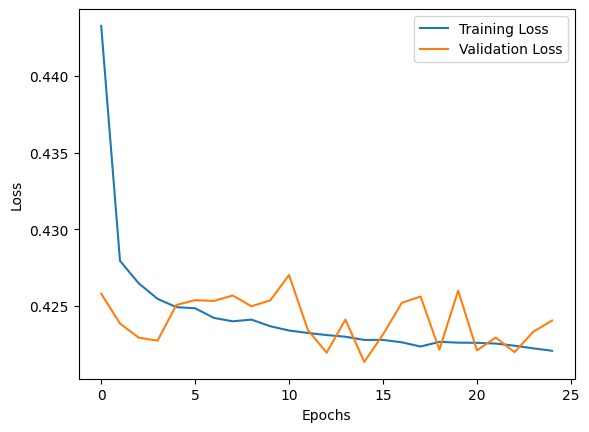

In [138]:
plt.plot(ann.epoch, ann.history['loss'], label='Training Loss')
plt.plot(ann.epoch, ann.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

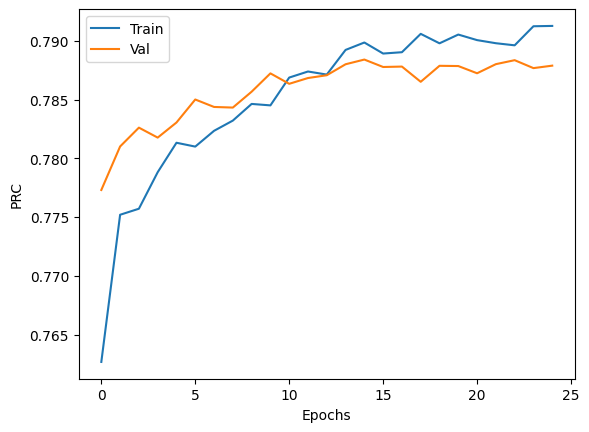

In [139]:
plt.plot(ann.epoch, ann.history['prc'], label='Train')
plt.plot(ann.epoch, ann.history['val_prc'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('PRC')
plt.legend()
plt.show()

In [140]:
model.evaluate(x_test, y_test, batch_size=100)

555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - FN: 784.7141 - FP: 4768.5864 - Precision: 0.7359 - Recall: 0.9431 - TN: 9206.4375 - TP: 13090.0322 - accuracy: 0.8024 - auc: 0.8547 - loss: 0.4209 - prc: 0.7969


[0.4227724075317383,
 0.8004721999168396,
 26078.0,
 18337.0,
 9544.0,
 1527.0,
 0.7320756912231445,
 0.9446839094161987,
 0.8536263704299927,
 0.7930004596710205]

In [141]:
pred=model.predict(x_test)
pred[:5]

1734/1734 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0.66589916],
       [0.7504786 ],
       [0.78985226],
       [0.01805609],
       [0.7436077 ]], dtype=float32)

In [142]:
y_test[:5]

3914632     0
6791536     1
6605073     1
10312028    0
10132128    0
Name: Response, dtype: int64

The predictions align with the real values.

In [143]:
fpr, tpr, thresholds=roc_curve(y_test, pred)

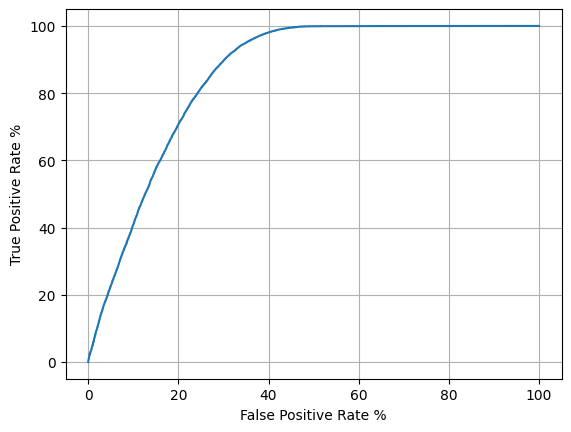

In [144]:
plt.plot(100*fpr, 100*tpr)
plt.xlabel('False Positive Rate %')
plt.ylabel('True Positive Rate %')
plt.grid(True)
plt.show()

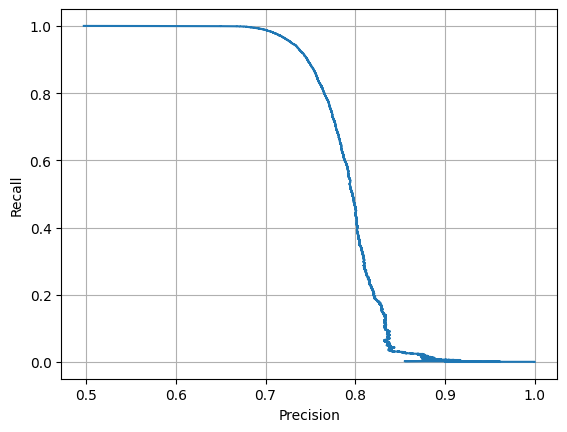

In [145]:
precision, recall, thresholds=precision_recall_curve(y_test, pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

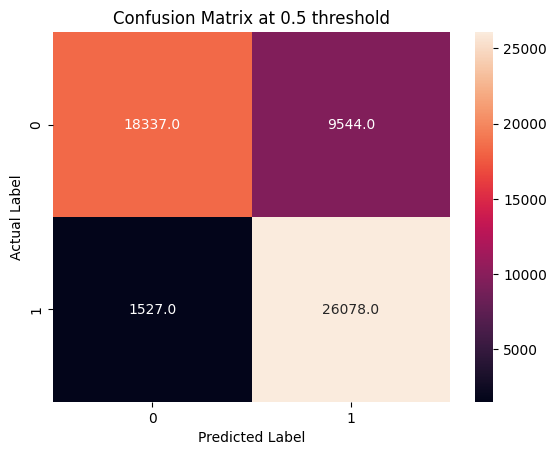

In [146]:
cm=confusion_matrix(y_test, pred>0.5)
sns.heatmap(cm, annot=True, fmt='.1f')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix at 0.5 threshold')
plt.show()

### Submission

In [147]:
dft.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage
0,1,20,1,47.0,0,1,0,2630.0,228
1,0,47,1,28.0,0,2,1,37483.0,123
2,0,47,1,43.0,0,2,1,2630.0,271
3,1,22,1,47.0,1,1,0,24502.0,115
4,0,51,1,19.0,0,2,0,34115.0,148


In [148]:
dftsc=scaler.transform(dft)

In [150]:
sub=pd.read_csv('/kaggle/input/playground-series-s4e7/sample_submission.csv')

In [151]:
sub.head()

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


In [152]:
pred=model.predict(dftsc)

239684/239684 ━━━━━━━━━━━━━━━━━━━━ 308s 1ms/step


In [153]:
pred=pd.DataFrame(pred, columns=['Response'])

In [154]:
pred.shape

(7669866, 1)

In [155]:
sub['Response']=pred

In [156]:
sub.head()

,id,Response
0,11504798,0.154389
1,11504799,0.759428
2,11504800,0.710155
3,11504801,0.004577
4,11504802,0.311360


In [157]:
sub.to_csv("C:\\Users\\subha\\OneDrive\\Desktop\\sample_submission.csv", index=False, mode='w')